In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics
from scipy.stats import skew, kurtosis
import pandas_profiling as pp

In [2]:
df = pd.read_csv("HeartDisease.csv", index_col = "names")

In [3]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
df.iloc[:,:8].describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000


In [5]:
df.skew()

C:\Users\matth\AppData\Local\Temp/ipykernel_23600/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


sbp          1.180591
tobacco      2.079210
ldl          1.313104
adiposity   -0.214646
typea       -0.346438
obesity      0.905219
alcohol      2.312699
age         -0.381734
chd          0.648095
dtype: float64

In [6]:
eda = pp.ProfileReport(df)
eda.to_file("HeartDisease_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

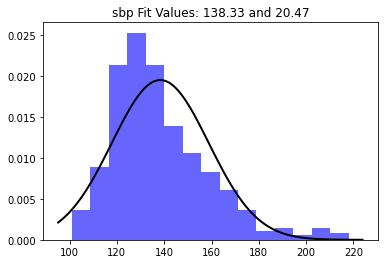

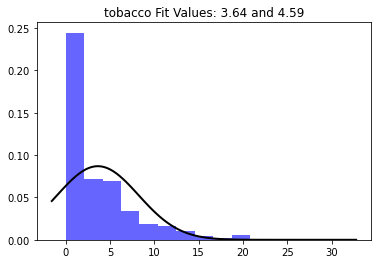

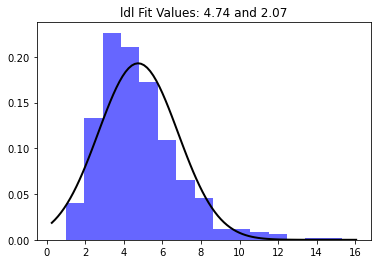

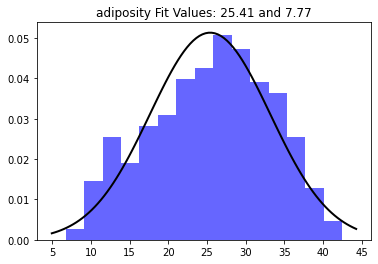

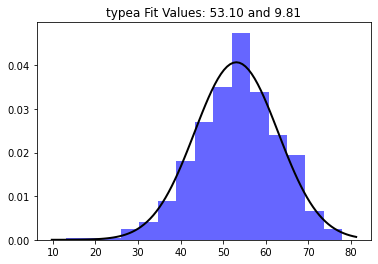

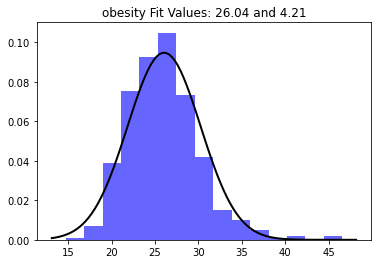

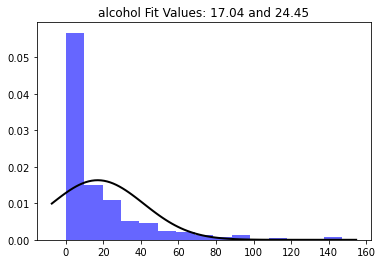

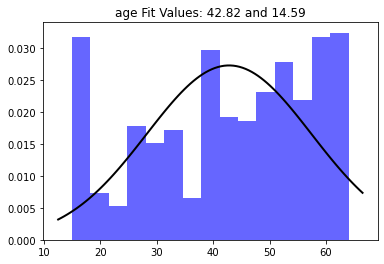

Saving complete!


In [7]:
for feature in df.select_dtypes(include=np.number).iloc[:,:8]:
    mu, std = norm.fit(df[feature]) 

    plt.hist(df[feature], bins=15, density=True, alpha=0.6, color='b')
  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
  
    plt.plot(x, p, 'k', linewidth=2)
    title = feature + " Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    plt.savefig(feature +" histogram.jpg", dpi = 600)
    plt.show()
print("Saving complete!")

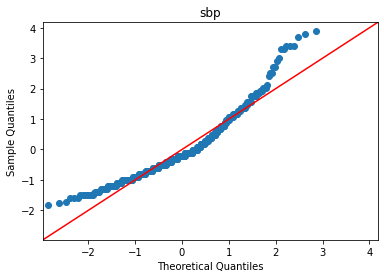

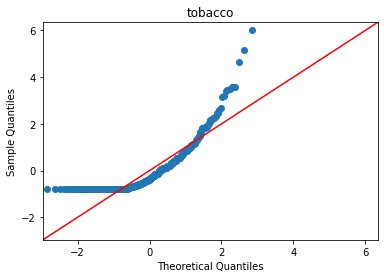

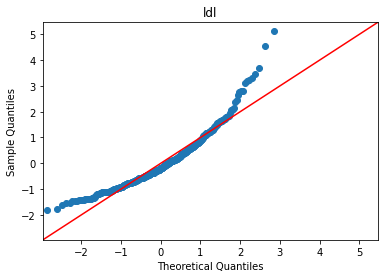

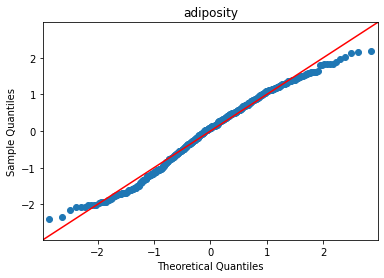

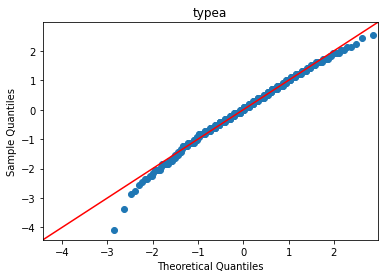

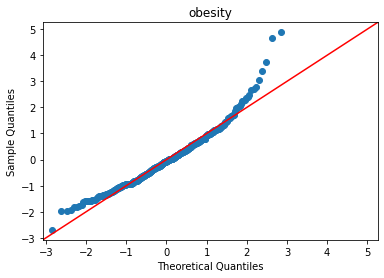

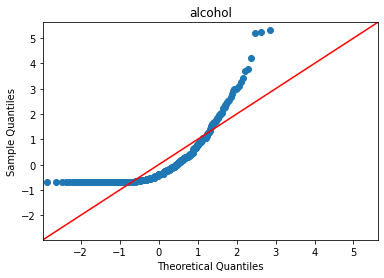

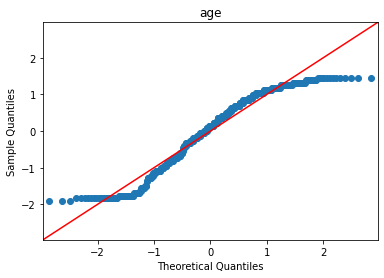

In [8]:
for feature in df.select_dtypes(include=np.number).iloc[:,:8]:
    sm.qqplot(df[feature], line = "45", fit = True)
    title = feature
    plt.title(title)
    plt.savefig(feature +" qqplot.jpg", dpi = 600)
    plt.show()

In [9]:
df_model = pd.get_dummies(df, prefix=['famhist'])
df_model.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
names,,,,,,,,,,,
1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1


In [10]:
X = df_model.drop(columns = "chd")
y = df_model["chd"]

In [11]:
formula = "chd ~ sbp + tobacco + ldl + adiposity + typea + obesity + alcohol + age + famhist_Absent + famhist_Present"

log_reg = smf.glm(formula = formula, data=df_model, family=sm.families.Binomial()).fit()

log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.07
Date:                Tue, 01 Nov 2022   Deviance:                       472.14
Time:                        16:24:22   Pearson chi2:                     452.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2353
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.7920      0.871     -4.353      0.000      -5.500      -2.084
sbp                 0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco             0.0794      0.027      2.984      0.003       0.027       0.132
ldl                 0.1739      0.060      2.915      0.004       0.057       0.291
adiposity           0.0186      0.029      0.635      0.526      -0.039       0.076
typea               0.0396      0.012      3.214      0.001       0.015       0.064
obesity            -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol             0.0001      0.004      0.027      0.978      -0.009       0.009
age                 0.0452      0.012      3.728      0.000       0.021       0.069
famhist_Absent     -2.3587      0.447     -5.279      0.000      -3.234      -1.483
famhist_Present    -1.4333      0.454     -3.159      0.002      -2.323      -0.544
===================================================================================
"""

In [12]:
df_transform = df.copy()
df_transform["sbp"] = np.power(df["sbp"], -2.0)
df_transform["tobacco"] = np.power(df["tobacco"], 0.4)
df_transform["ldl"] = np.power(df["ldl"], 0.1)
df_transform["obesity"] = np.power(df["obesity"], -0.4)
df_transform["alcohol"] = np.power(df["alcohol"], 0.4)

In [13]:
df_transform.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
names,,,,,,,,,,
1,0.000039,2.701920,1.190736,23.11,Present,49,0.274632,6.238304,52,1
2,0.000048,0.158489,1.159962,28.61,Absent,55,0.260508,1.335202,63,1
3,0.000072,0.364113,1.132812,32.28,Present,52,0.259540,1.707536,46,0
4,0.000035,2.238847,1.204164,38.03,Present,51,0.250031,3.580604,58,1
5,0.000056,2.840636,1.133462,27.78,Present,60,0.271692,5.051066,49,1


In [14]:
df_transform.iloc[:,:8].describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.000055,1.260970,1.159087,25.406732,53.103896,0.273360,2.263569
std,0.000014,0.942649,0.049116,7.780699,9.817534,0.017073,1.799918
min,0.000021,0.000000,0.997982,6.740000,13.000000,0.215140,0.000000
25%,0.000046,0.307415,1.126213,19.775000,47.000000,0.261865,0.763885
50%,0.000056,1.319508,1.158108,26.115000,53.000000,0.272470,2.239993
75%,0.000065,1.977630,1.191976,31.227500,60.000000,0.285380,3.558795
max,0.000098,3.959696,1.313876,42.490000,78.000000,0.341250,7.364637


In [15]:
df_transform.skew()

C:\Users\matth\AppData\Local\Temp/ipykernel_23600/2581206598.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_transform.skew()


sbp          0.063304
tobacco      0.134728
ldl          0.028745
adiposity   -0.214646
typea       -0.346438
obesity     -0.000273
alcohol      0.400945
age         -0.381734
chd          0.648095
dtype: float64

In [16]:
eda = pp.ProfileReport(df_transform)
eda.to_file("HeartDisease_transformed_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

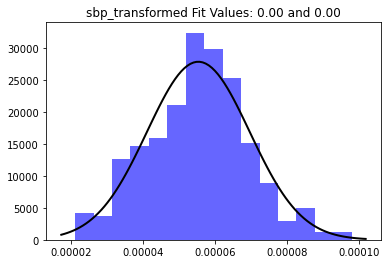

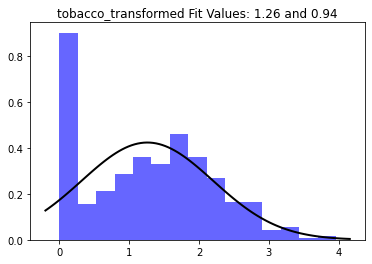

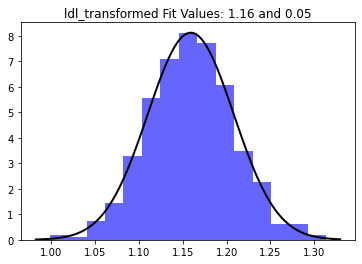

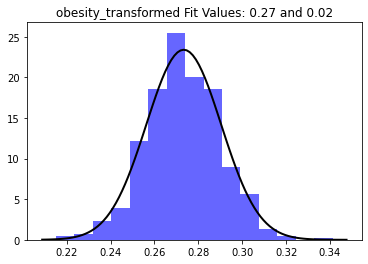

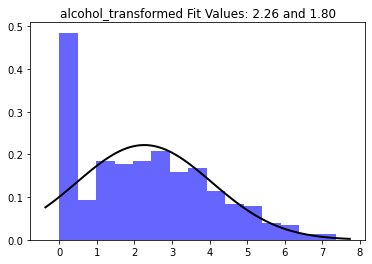

Saving complete!


In [17]:
feature_list = ["sbp", "tobacco", "ldl", "obesity", "alcohol"]
for feature in feature_list:
    mu, std = norm.fit(df_transform[feature]) 

    plt.hist(df_transform[feature], bins=15, density=True, alpha=0.6, color='b')
  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
  
    plt.plot(x, p, 'k', linewidth=2)
    title = feature + "_transformed Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    plt.savefig(feature +"_transformed histogram.jpg", dpi = 600)
    plt.show()
print("Saving complete!")

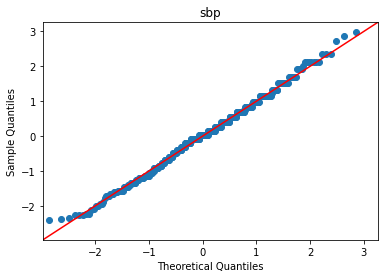

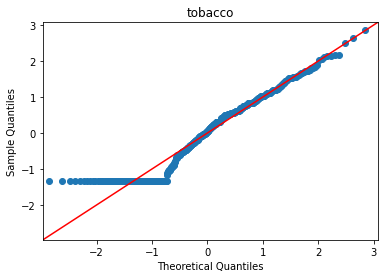

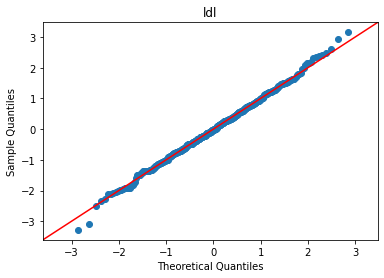

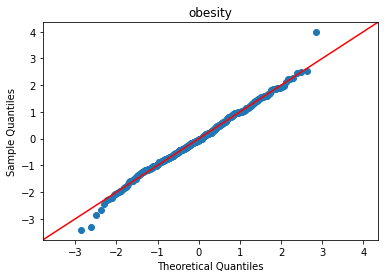

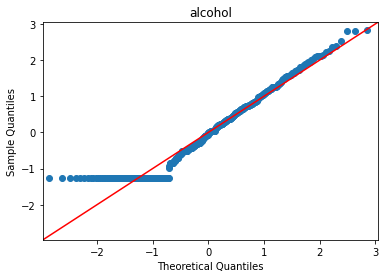

In [18]:
for feature in feature_list:
    sm.qqplot(df_transform[feature], line = "45", fit = True)
    title = feature
    plt.title(title)
    plt.savefig(feature +"_transformed qqplot.jpg", dpi = 600)
    plt.show()

In [19]:
df_model = pd.get_dummies(df_transform, prefix=['famhist'])
df_model.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
names,,,,,,,,,,,
1,0.000039,2.701920,1.190736,23.11,49,0.274632,6.238304,52,1,0,1
2,0.000048,0.158489,1.159962,28.61,55,0.260508,1.335202,63,1,1,0
3,0.000072,0.364113,1.132812,32.28,52,0.259540,1.707536,46,0,0,1
4,0.000035,2.238847,1.204164,38.03,51,0.250031,3.580604,58,1,0,1
5,0.000056,2.840636,1.133462,27.78,60,0.271692,5.051066,49,1,0,1


In [20]:
X_transform = df_model.drop(columns = "chd")


In [21]:
formula = "chd ~ sbp + tobacco + ldl + adiposity + typea + obesity + alcohol + age + famhist_Absent + famhist_Present"

log_full = smf.glm(formula = formula, data=df_model, family=sm.families.Binomial()).fit()
log_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -234.97
Date:                Tue, 01 Nov 2022   Deviance:                       469.95
Time:                        16:24:57   Pearson chi2:                     450.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2390
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -13.9631      3.352     -4.165      0.000     -20.534      -7.392
sbp             -4800.4981   8559.784     -0.561      0.575   -2.16e+04     1.2e+04
tobacco             0.4414      0.141      3.124      0.002       0.164       0.718
ldl                 7.6975      2.717      2.833      0.005       2.372      13.023
adiposity           0.0345      0.030      1.145      0.252      -0.025       0.094
typea               0.0392      0.012      3.193      0.001       0.015       0.063
obesity            22.4078     11.475      1.953      0.051      -0.082      44.898
alcohol             0.0012      0.065      0.019      0.985      -0.126       0.128
age                 0.0422      0.012      3.397      0.001       0.018       0.067
famhist_Absent     -7.4285      1.681     -4.420      0.000     -10.722      -4.135
famhist_Present    -6.5346      1.680     -3.891      0.000      -9.826      -3.243
===================================================================================
"""

In [22]:
formula = "chd ~ tobacco + ldl + typea + age + famhist_Absent + famhist_Present"

log_reduced = smf.glm(formula = formula, data=df_model, family=sm.families.Binomial()).fit()

log_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      456
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.21
Date:                Tue, 01 Nov 2022   Deviance:                       474.43
Time:                        16:24:57   Pearson chi2:                     464.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2316
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.9966      1.962     -4.585      0.000     -12.842      -5.151
tobacco             0.4430      0.135      3.283      0.001       0.179       0.708
ldl                 6.9682      2.465      2.826      0.005       2.136      11.800
typea               0.0366      0.012      3.010      0.003       0.013       0.060
age                 0.0486      0.010      4.657      0.000       0.028       0.069
famhist_Absent     -4.9365      0.981     -5.030      0.000      -6.860      -3.013
famhist_Present    -4.0601      0.994     -4.086      0.000      -6.007      -2.113
===================================================================================
"""

In [23]:
X_transform_reduce = df_model.drop(columns = ["chd", "sbp", "adiposity", "obesity", "alcohol"])

In [24]:
y1 = log_reg.predict(X)
y2 = log_full.predict(X_transform)
y3 = log_reduced.predict(X_transform_reduce)

In [25]:
fpr1, tpr1, _ = metrics.roc_curve(y,  y1)
fpr2, tpr2, _ = metrics.roc_curve(y,  y2)
fpr3, tpr3, _ = metrics.roc_curve(y,  y3)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
auc3 = metrics.auc(fpr3, tpr3)


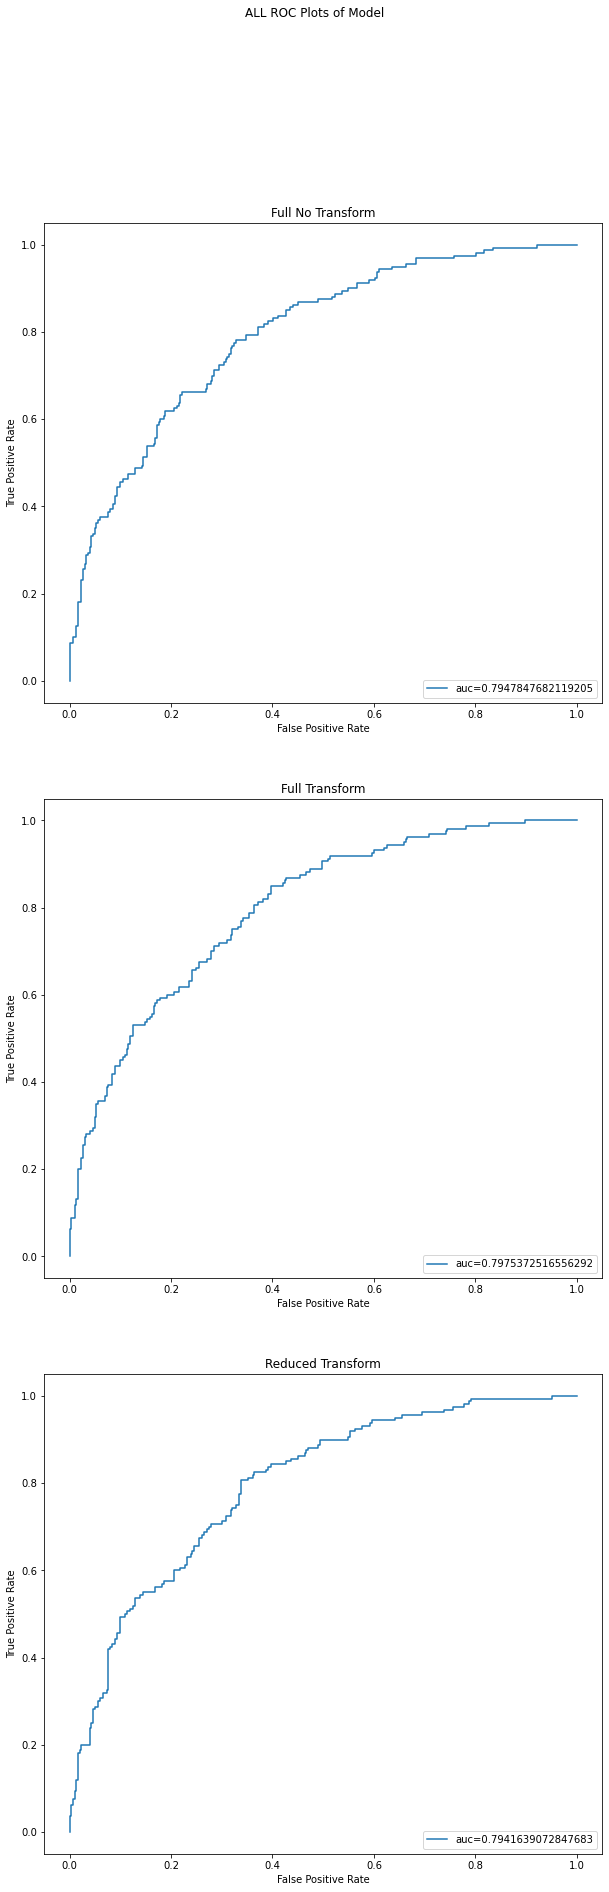

In [26]:
fig, axs = plt.subplots(3, figsize=(10, 30))
fig.suptitle('ALL ROC Plots of Model')
axs[0].plot(fpr1,tpr1,label="auc="+str(auc1))
axs[0].set_title('Full No Transform')

axs[1].plot(fpr2,tpr2,label="auc="+str(auc2))
axs[1].set_title('Full Transform')

axs[2].plot(fpr3,tpr3,label="auc="+str(auc3))
axs[2].set_title('Reduced Transform')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.savefig("AUC Curves.jpg", dpi = 600)
plt.show()